### Eco 100 diagrams

## Linear Demand and Supply Diagram

This is a jupyter notebook to generate a simple interactive supply and demand diagram using python and `ipywidgets` (interactive HTML widgets) to provide sliders and animations.

To run this notebook first run the code cells in the [code Section](#Code-Section) below and then return to run the cells below.

---

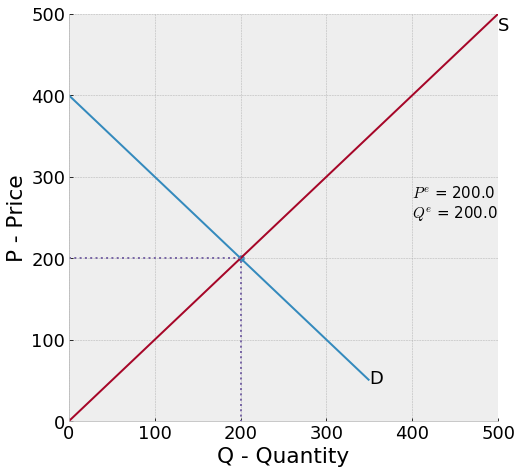

In [6]:
mkt(A=400, b=1, F=0, c=1)

### interactive plot
Move the sliders in the next cell to shift Supply or Demand in or out

Note: this will not display unless you are running this on a jupyter server

In [8]:
interact(mkt, A=(200,500,10),b=fixed(1),F=(0,300,10),c=fixed(1));

interactive(children=(IntSlider(value=200, description='A', max=500, min=200, step=10), IntSlider(value=0, des…

---

## Code Section
We've put the code down here to keep the presentation uncluttered. Run the cells below first and then return to cells above where these functions are called.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

The following is just styling for the graph

In [2]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18

Now let's define simple linear (inverse) demand and supply functions:

In [3]:
def PD(Q, A, b):
    return np.array(A - b * Q)

def PS(Q, F, c):
    return np.array(F + c * Q)

In [4]:
def mkt(A=200, b=1, F=0, c=1):
    '''Draw supply and demand diagram and calculate market equilibrium price and quantity'''
    xmax = ymax = 500
    xclip = 400
    Q = np.arange(xmax)
    
    # for aesthetic reasons we clip demand curve line to end above the x-axis by plotting over shorter Q_ 
    d_end = np.round((A-50)/b)
    Q_ = np.arange(0, d_end)
    s_end = (xmax - F)/c    # to keep S label inside box
    
    plt.figure(figsize=(7.7,7.5))
    plt.xlim(0,xmax)
    plt.ylim(0, ymax)
    plt.xlabel('Q - Quantity')
    plt.ylabel('P - Price')
    
    plt.plot(Q_,PD(Q_,A,b))
    plt.text(d_end, PD(d_end, A,b)-4, 'D', fontsize = 18)
    plt.plot(Q,PS(Q,F,c))
    plt.text(s_end, PS(s_end, F,c)-20, 'S', fontsize = 18)
    
    # market equilibrium
    Qe = (A-F)/(c+b)
    Pe = PD(Qe, A, b)
    CS = (1/2)*(A-Pe)*Qe
    plt.scatter(Qe, Pe)
    plt.plot([0, Qe, Qe],[Pe, Pe, 0], ':')

    msg1 = f'$P^e$ = {Pe:2.1f}'
    msg2 = f'$Q^e$ = {Qe:2.1f}'
    msg3 = f'$CS$ = {CS:2.0f}'
    plt.text(400, 275,msg1, fontsize=15)
    plt.text(400, 250,msg2, fontsize=15);
    

#### Notes: the simple math behind the diagram

A demand curve tells us the quantity $Q$ that will be demanded of a good at any given price. This suggests a relationship of the form $Q(P)$, i.e. $Q$ as a function of $P$. 

However, by historical convention economists have almost always drawn demand curves with quantity $Q$ on the horizontal axis and price $P$ on the vertical axis. For some this might suggest we are plotting a function of the form $P(Q)$.  This is an 'inverse' demand function (the maximum price at which quantity Q will be demanded).       

In the diagram we use a linear (inverse) **demand curve** of the form:

$$P^D(Q) = A + b \cdot Q$$

this of course corresponds to a Demand curve of the form $Q^D(P) = \frac{A}{b} - \frac{1}{b}P$

The (inverse) **supply curve** curve is of the form:

$$P^S(Q) = F + c \cdot Q$$

As will be seen later in the course the market supply curve is a marginal cost curve.

The market equilibrium price $P^e$ can be found where supply meets demand.  

$$P^S(Q) = P^e = P^D(Q)$$

With the linear demand and supply system above we can easily solve for the market equilibrium quantity $Q^e$

$$A+ b \cdot Q^e  = F + c \cdot Q^e$$

which leads to:

$$Q^e = \frac{A-F}{c+b}$$

And the market equilibrium price $P^e$ is then easuily found from either $P^D(Q^e)$ or $P^S(Q^e)$ 